In [1]:
import os
import pandas as pd
import importlib
import sys
sys.path.append(os.path.abspath("../"))  # Add directory
import eval_metrics  # Import module
import balance_df
# Reload if modified
importlib.reload(eval_metrics)
from eval_metrics import evaluate_model, custom_threshold_condition
from balance_df import balance_dataset

### NB_SVM Toxic Comment

In [6]:
nt = pd.read_csv("nbsvm_toxiccomment.csv")
nt.head()

,id,comment_text,true_label,threat_probability,pred_label
0,55858b89f99e9bda,Hope he dies \n\nNow this Atheist filth's wife...,1,0.444857,0
1,425a1dbdf740e9b8,"2006 (UTC)\n\n Removed Merge 17:15, 5 April",0,0.000088,0
2,20c81b99f7adf557,John discuss it here \n\nSeems you don't like ...,0,0.000116,0
3,af0dce6ce84974ec,"""\nTo answer your question, no. There is no si...",0,0.000086,0
4,a069e6d6d1a2348d,"""\n But Arpad can cite any webpage he finds, o...",0,0.000068,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.83      1.00      0.91       689
      Threat       1.00      0.79      0.88       689

    accuracy                           0.90      1378
   macro avg       0.91      0.90      0.89      1378
weighted avg       0.91      0.90      0.89      1378


✅ Accuracy: 0.8955
✅ Precision: 1.0000
✅ Recall: 0.7910
✅ F1 Score: 0.8833


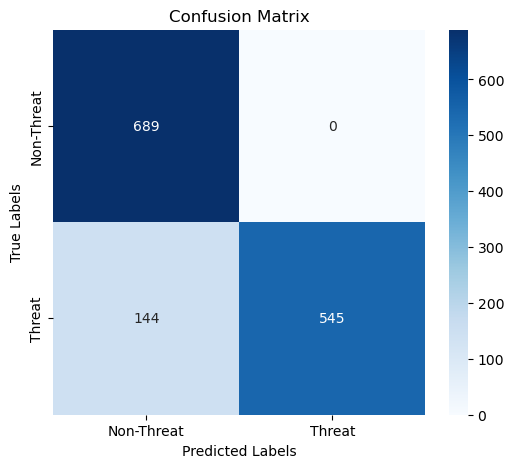

In [8]:
evaluate_model(y_true=nt['true_label'], y_pred=nt['pred_label'], class_labels=["Not Threat", "Threat"])

### NBSVM Jigsaw

In [11]:
nj = pd.read_csv("nbsvm_jigsaw.csv")
nj.head()

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,Threat_Jigsaw,toxicity_annotator_count,true_label,threat_probability,pred_label
0,304799,Is your concern satisfied by the fact that the...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,0,0.000111,0
1,5293619,Comey's firing is a separate issue from the ma...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,0,0.000156,0
2,5009206,klastri> besides the legal points. She shoul...,0.500000,0.1,0.000000,0.0,0.000000,0.100000,0.500000,10,1,0.001190,0
3,6122758,Trump has been the only one to threaten to wip...,0.536232,0.0,0.086957,0.0,0.057971,0.536232,0.043478,69,0,0.000459,0
4,6018742,"Just listen to yourself.\n""the swamp"" (twice!)...",0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,0,0.000120,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.60      1.00      0.75       747
      Threat       1.00      0.01      0.02       498

    accuracy                           0.60      1245
   macro avg       0.80      0.51      0.39      1245
weighted avg       0.76      0.60      0.46      1245


✅ Accuracy: 0.6040
✅ Precision: 1.0000
✅ Recall: 0.0100
✅ F1 Score: 0.0199


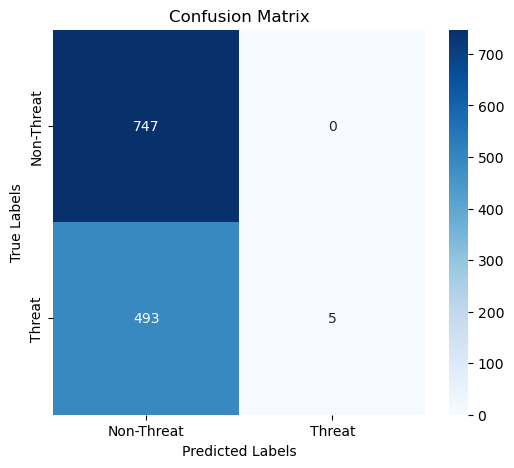

In [13]:
evaluate_model(y_true=nj['true_label'], y_pred=nj['pred_label'], class_labels=["Not Threat", "Threat"])

### Combined Profanity Toxicity

In [16]:
nc = pd.read_csv("nbsvm_combined.csv")
nc.head()

,text,labels,encoded_labels,true_label,threat_probability,pred_label
0,Agree. The number of morons that shoot animal...,['toxic' 'threat' 'insult'],"[1, 0, 1, 0, 1, 0, 0, 0, 0]",1,0.037256,0
1,"""As long as we get to shoot them at some point...",['toxic' 'threat'],"[1, 0, 0, 0, 1, 0, 0, 0, 0]",1,0.000394,0
2,mad know take never felt angry mad never get g...,['selfharm'],"[0, 0, 0, 0, 0, 0, 0, 1, 0]",0,0.011681,0
3,The RINOS in charge of the Congress would neve...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.000097,0
4,Which of Trump's appointments do you believe w...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.000133,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.63      1.00      0.77       516
      Threat       1.00      0.12      0.22       344

    accuracy                           0.65       860
   macro avg       0.82      0.56      0.50       860
weighted avg       0.78      0.65      0.55       860


✅ Accuracy: 0.6500
✅ Precision: 1.0000
✅ Recall: 0.1250
✅ F1 Score: 0.2222


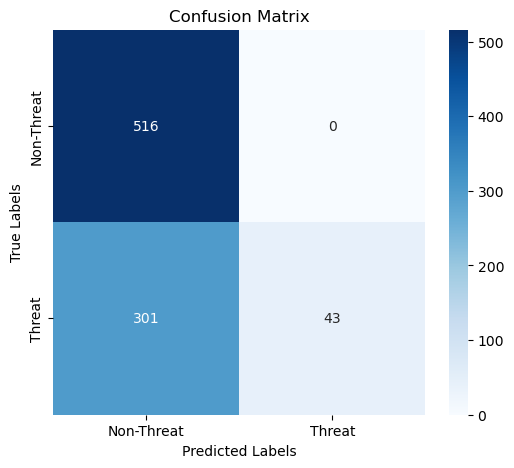

In [18]:
evaluate_model(y_true=nc['true_label'], y_pred=nc['pred_label'], class_labels=["Not Threat", "Threat"])

### Suspicious Tweets

In [22]:
sus = pd.read_csv("nbsvm_sus.csv")
sus.head()

,message,label,threat_probability,pred_label
0,@MsLynnGallo Never mind - You missed the joke ...,0,0.000028,0
1,turns out there had been #earthquake warnings ...,1,0.000249,0
2,@susanhutchinson The other thing is the accent...,0,0.000456,0
3,@LolKate18 You like Ladyhawke? You are so cool,0,0.000161,0
4,#asot400 we want to see some pics of the locat...,0,0.000132,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.60      1.00      0.75      9217
      Threat       0.00      0.00      0.00      6145

    accuracy                           0.60     15362
   macro avg       0.30      0.50      0.37     15362
weighted avg       0.36      0.60      0.45     15362


✅ Accuracy: 0.5999
✅ Precision: 0.0000
✅ Recall: 0.0000
✅ F1 Score: 0.0000


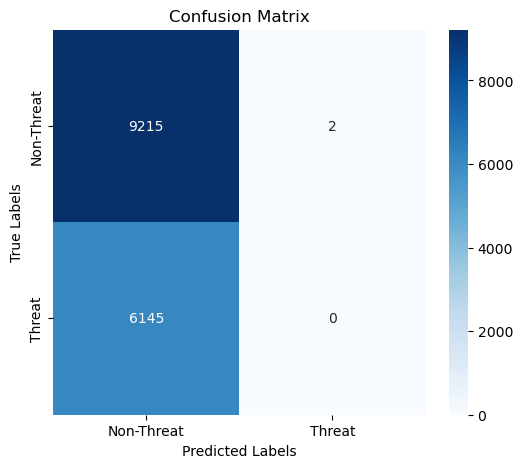

In [24]:
evaluate_model(y_true=sus['label'], y_pred=sus['pred_label'], class_labels=["Not Threat", "Threat"])

### Lifethreat

In [31]:
nl = pd.read_csv("nbsvm_lifethreat.csv")
nl.head()

,ID,Comments,threat_probability,pred_label
0,1.0,White people attacking police and no one was s...,0.000139,0
1,2.0,yall needed 20 officers for one guy why yall a...,0.001647,0
2,3.0,I think that cop wanted him attack metro loves...,0.000137,0
3,4.0,This is just like the judge attack. Got offend...,0.000123,0
4,5.0,Then he got his face slammed into the wall.,0.000198,0


In [45]:
import numpy as np
nl['true_label']=np.ones(len(nl)).astype(int)
nl.head()

,ID,Comments,threat_probability,pred_label,true_label
0,1.0,White people attacking police and no one was s...,0.000139,0,1
1,2.0,yall needed 20 officers for one guy why yall a...,0.001647,0,1
2,3.0,I think that cop wanted him attack metro loves...,0.000137,0,1
3,4.0,This is just like the judge attack. Got offend...,0.000123,0,1
4,5.0,Then he got his face slammed into the wall.,0.000198,0,1



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.00      0.00      0.00         0
      Threat       1.00      0.00      0.00      1071

    accuracy                           0.00      1071
   macro avg       0.50      0.00      0.00      1071
weighted avg       1.00      0.00      0.00      1071


✅ Accuracy: 0.0009
✅ Precision: 1.0000
✅ Recall: 0.0009
✅ F1 Score: 0.0019


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


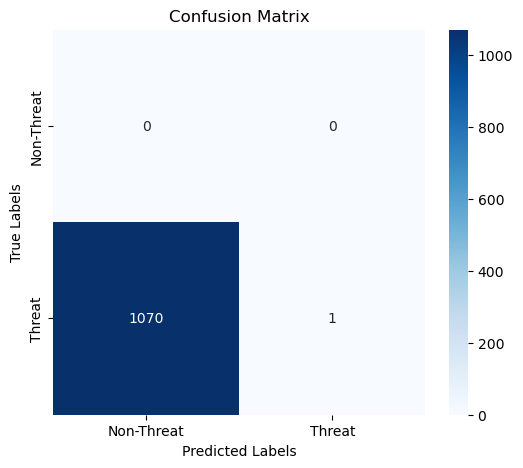

In [53]:
evaluate_model(y_true=nl['true_label'], y_pred=nl['pred_label'], class_labels=["Not Threat", "Threat"])